In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
### shift + enter

In [ ]:
data = pd.read_csv("/content/heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
data['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

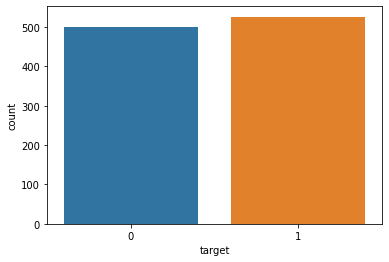

In [ ]:
sns.countplot(x='target',data=data)
plt.show()

In [ ]:
len(data[data['target']==1])

526

In [ ]:
count_having = len(data[data['target']==1])
count_not_having = len(data[data['target']==0])
per_having = round((count_having/len(data))*100,2)
per_not_having = round((count_not_having/len(data))*100,2)
print("Percentage of patients having disease - "+str(per_having))
print("Percentage of patients not having disease - "+str(per_not_having))

Percentage of patients having disease - 51.32
Percentage of patients not having disease - 48.68


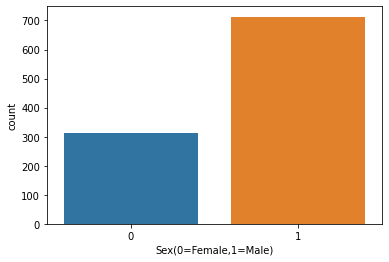

In [ ]:
sns.countplot(x='sex',data=data)
plt.xlabel("Sex(0=Female,1=Male)")
plt.show()

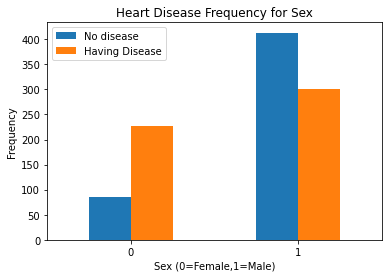

In [ ]:
### Heart Disease Frequency for Sex
pd.crosstab(data['sex'],data['target']).plot(kind="bar")
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("Sex (0=Female,1=Male)")
plt.ylabel("Frequency")
plt.xticks(rotation=0)
plt.legend(["No disease","Having Disease"])
plt.show()

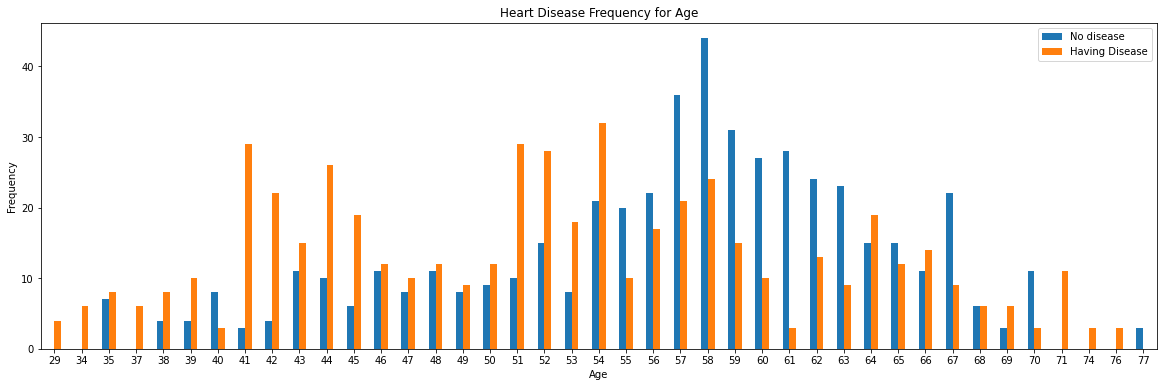

In [ ]:
### Heart Disease Frequency for Age
pd.crosstab(data['age'],data['target']).plot(kind="bar",figsize=(20,6))
plt.title("Heart Disease Frequency for Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.xticks(rotation=0)
plt.legend(["No disease","Having Disease"])
plt.show()

In [ ]:
data.age[data.target==1]

5       58
10      71
12      34
15      34
16      51
        ..
1011    45
1014    44
1019    47
1020    59
1023    50
Name: age, Length: 526, dtype: int64

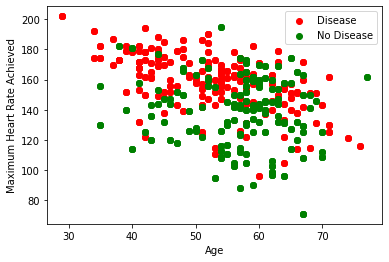

In [ ]:
plt.scatter(x=data.age[data.target==1],y=data.thalach[data.target==1],color="red")
plt.scatter(x=data.age[data.target==0],y=data.thalach[data.target==0],color="green")
plt.legend(["Disease","No Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate Achieved")
plt.show()

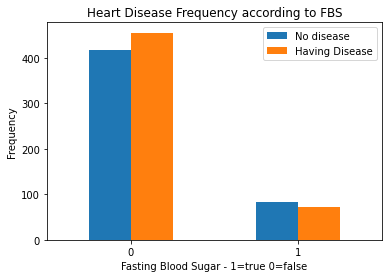

In [ ]:
### Heart Disease Frequency According to FBS
pd.crosstab(data['fbs'],data['target']).plot(kind="bar")
plt.title("Heart Disease Frequency according to FBS")
plt.xlabel("Fasting Blood Sugar - 1=true 0=false")
plt.ylabel("Frequency")
plt.xticks(rotation=0)
plt.legend(["No disease","Having Disease"])
plt.show()

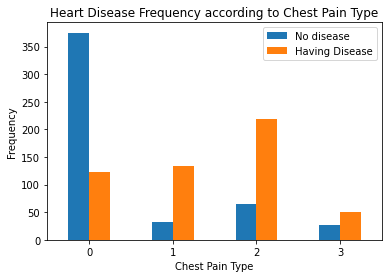

In [ ]:
### Heart Disease Frequency According to Chest Pain Type
pd.crosstab(data['cp'],data['target']).plot(kind="bar")
plt.title("Heart Disease Frequency according to Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Frequency")
plt.xticks(rotation=0)
plt.legend(["No disease","Having Disease"])
plt.show()

In [ ]:
## Divide the data into features and targets

In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
x = data.iloc[:,:13]  ## features
y = data.iloc[:,13].values   ## target

In [ ]:
x_nor = (x - np.min(x))/(np.max(x)-np.min(x)).values
x_nor

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.479167,1.0,0.000000,0.292453,0.196347,0.0,0.5,0.740458,0.0,0.161290,1.0,0.50,1.000000
1,0.500000,1.0,0.000000,0.433962,0.175799,1.0,0.0,0.641221,1.0,0.500000,0.0,0.00,1.000000
2,0.854167,1.0,0.000000,0.481132,0.109589,0.0,0.5,0.412214,1.0,0.419355,0.0,0.00,1.000000
3,0.666667,1.0,0.000000,0.509434,0.175799,0.0,0.5,0.687023,0.0,0.000000,1.0,0.25,1.000000
4,0.687500,0.0,0.000000,0.415094,0.383562,1.0,0.5,0.267176,0.0,0.306452,0.5,0.75,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.625000,1.0,0.333333,0.433962,0.216895,0.0,0.5,0.709924,1.0,0.000000,1.0,0.00,0.666667
1021,0.645833,1.0,0.000000,0.292453,0.301370,0.0,0.0,0.534351,1.0,0.451613,0.5,0.25,1.000000
1022,0.375000,1.0,0.000000,0.150943,0.340183,0.0,0.0,0.358779,1.0,0.161290,0.5,0.25,0.666667
1023,0.437500,0.0,0.000000,0.150943,0.292237,0.0,0.0,0.671756,0.0,0.000000,1.0,0.00,0.666667


In [ ]:
### Split Data into Train and Test (80-20)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x_nor,y,train_size=0.80,random_state=4)

In [ ]:
len(xtrain)

820

In [ ]:
len(xtest)

205

In [ ]:
xtrain.shape

(820, 13)

In [ ]:
pd.DataFrame(ytrain).value_counts()

1    428
0    392
dtype: int64

In [ ]:
import tensorflow.keras as tf

In [ ]:
#### Build the model
model = tf.models.Sequential()
model.add(tf.layers.Dense(16,input_dim=13,activation='relu'))
model.add(tf.layers.Dense(32,activation='relu'))
model.add(tf.layers.Dense(2,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
### train the model
model.fit(xtrain,ytrain,epochs=500,validation_data=(xtest,ytest))

Epoch 1/500
26/26 [==============================] - 1s 9ms/step - loss: 0.6922 - accuracy: 0.5598 - val_loss: 0.6192 - val_accuracy: 0.8098
Epoch 2/500
26/26 [==============================] - 0s 3ms/step - loss: 0.5797 - accuracy: 0.7963 - val_loss: 0.5286 - val_accuracy: 0.8000
Epoch 3/500
26/26 [==============================] - 0s 3ms/step - loss: 0.4953 - accuracy: 0.8098 - val_loss: 0.4806 - val_accuracy: 0.7951
Epoch 4/500
26/26 [==============================] - 0s 3ms/step - loss: 0.4403 - accuracy: 0.8110 - val_loss: 0.4503 - val_accuracy: 0.7951
Epoch 5/500
26/26 [==============================] - 0s 3ms/step - loss: 0.4090 - accuracy: 0.8305 - val_loss: 0.4406 - val_accuracy: 0.7951
Epoch 6/500
26/26 [==============================] - 0s 3ms/step - loss: 0.3906 - accuracy: 0.8293 - val_loss: 0.4267 - val_accuracy: 0.8000
Epoch 7/500
26/26 [==============================] - 0s 3ms/step - loss: 0.3768 - accuracy: 0.8378 - val_loss: 0.4271 - val_accuracy: 0.8049
Epoch 8/500
2

In [ ]:
### Prediction/Testing
ypred = model.predict(xtest)
ypred = ypred.argmax(axis=1)
ypred

7/7 [==============================] - 0s 2ms/step


array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0])

In [ ]:
ytest

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0])

In [ ]:
#### Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest,ypred)
cm

array([[102,   5],
       [  0,  98]])

In [ ]:
from sklearn.metrics import accuracy_score
a = accuracy_score(ytest,ypred)
a

0.975609756097561